# Computer Vision Lab

## 1. Introduction

This hands on lab will introduce you with the concept of convolutional neural networks used for image classification. Our goal will be to build a ConvNet with the high level of accuracy. Convolutional networks provide a machinery to learn these filters from the data directly instead of explicit mathematical models and have been found to be superior (in real world tasks) compared to historically crafted filters.  With convolutional networks, the focus is on learning the filter weights instead of learning individually fully connected pair-wise (between inputs and outputs) weights.

The MNIST dataset consisting of images of handwritten numbers from 0 to 9 will be used as a training, validation and test dataset. Data set is shown below.

<br>
<img src="http://petr-marek.com/wp-content/uploads/2017/07/mnist.png" width="480">
<br><br>

Keras API with Tensorflow or CNTK as a backend will be used to build the CNN network. Before building and training a network you will be dealing with MNIST data analysis, visualisation and preprocessing. After preparing the data a process of designing, building and evaluating the network will be performed. We will experiment with different models by changing their parameters.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import seaborn as sns

#np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
#from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ReduceLROnPlateau

## 2. Data download

The MNIST database contains standard handwritten digits that have been widely used for training and testing of machine learning algorithms. It has a training set of 60,000 images and a test set of 10,000 images with each image being 28 x 28 pixels. This set is easy to use visualize and train on any computer. The MNIST dataset is usually provided and downloadable as part of the Keras library.


In [38]:
#download MNIST data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Example of a CNTK based function used for downloading the MNIST dataset. Comparing this function with the Keras option clearly shows the difference, simplicity and usability of Keras module.

<img src="images/mnistdownload.png">

## Explore the train and test data

In [39]:
#check the shape, size and dtype of loaded dataset
print(f'The shape of training set is: {X_train.shape}')
print(f'The shape of test set is: {X_test.shape}\n')

print(f'The size of training set is: {X_train.size/1024} kB')
print(f'The size of test set is: {X_test.size/1024} kB\n')


print(f'The training set is: {X_train.ndim} - dimensional array')
print(f'The test set is: {X_test.ndim} - dimensional array\n')

print(f'The training set type is: {X_train.dtype}')
print(f'The test set type is: {X_test.dtype}\n')

The shape of training set is: (60000, 28, 28)
The shape of test set is: (10000, 28, 28)

The size of training set is: 45937.5 kB
The size of test set is: 7656.25 kB

The training set is: 3 - dimensional array
The test set is: 3 - dimensional array

The training set type is: uint8
The test set type is: uint8



Explore the label dataset

In [40]:
#chek the shape, size, number of dimensions and dtype of loaded labels dataset
#insert your code below



## Visualize training data from MNIST dateset

In [41]:
# Plot a random image from the training set 
# np.random.randint returns random integers between 0 and 59999.
sampleNo = np.random.randint(0,59999)
print(f'Sample number is {sampleNo}\n')
sampleImg=X_train[sampleNo]
print(f'Image number {sampleNo} in MNIST dataset has the following {sampleImg.shape}\n')
#print(sampleImg,'\n')
print(f'Shape of the image is {sampleImg.shape} and image is {type(sampleImg)} array\n')

Sample number is 53141

Image number 53141 in MNIST dataset has the following (28, 28)

Shape of the image is (28, 28) and image is <class 'numpy.ndarray'> array



It can be helpful to plot and visualise the data before proceeding with further data handling and model design. This can help us avoid issues later during the model training. 

0 AxesSubplot(0.125,0.125;0.110714x0.755)
1 AxesSubplot(0.257857,0.125;0.110714x0.755)
2 AxesSubplot(0.390714,0.125;0.110714x0.755)
3 AxesSubplot(0.523571,0.125;0.110714x0.755)
4 AxesSubplot(0.656429,0.125;0.110714x0.755)
5 AxesSubplot(0.789286,0.125;0.110714x0.755)


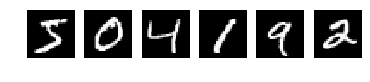

In [42]:
#plt.imshow(X_train[sampleNo,:,:].reshape(28,28), )
#plt.imshow(sampleImg, cmap='gray')
#plt.axis('off')
#print("Image label: ", y_train[sampleNo])

fig,axes=plt.subplots(nrows=1,ncols=6)
for i,ax in enumerate(axes):
    print(i, ax)
    ax.imshow(X_train[i], cmap="gray")
    ax.axis('off')    
plt.show()

The shape of images in MNIST dataset is 28 x 28 x 1 pixels which means that the convolutional neural network will be able to run over each image in our dataset pretty fast.

## Visualize labels from training data set

For visualisation of labels data we'll perform transformation to Pandas data frame.

In [43]:
y_trains=pd.Series(y_train)

In [44]:
# show the frequency distribution of label values 
print(y_trains.value_counts())

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64


In [45]:
#show statistics 
print(y_trains.describe())

count    60000.000000
mean         4.453933
std          2.889270
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
dtype: float64


## Plot the frequency distribution of training label values

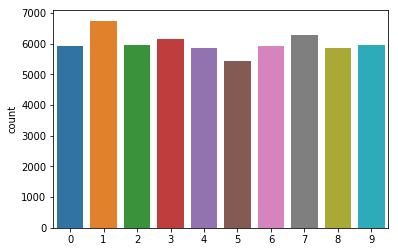

In [46]:
g = sns.countplot(y_trains)

## Plot the frequency distribution of test label values

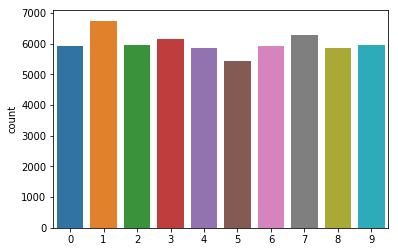

In [47]:
y_tests=pd.Series(y_train)
g = sns.countplot(y_tests)

## Preprocessing of training and test data
This step requires declaring a dimension for the depth of the input image. As shown previosly images in our data set have the following shape (60000, 28, 28). The first parameters reffers to number of images in dataset and other two parameters represent image width and image height. Hence, the depth parameter for images is missing. In this case depth is 1 because we are working with grayscale images. In case of color images the depth parameter would be 3. 

In [48]:
# Reshapes data
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

The final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1]

In [49]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('Original training data shape:', X_train.shape)
print('New training data shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Original training data shape: (60000, 28, 28)
New training data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Preprocessing of labels data

Before proceeding with preprocessing let's us check once again attributes of our labels

In [50]:
#chek the shape, size and dtype of labels in dataset
print(f'The shape of training set is: {y_train.shape}')
print(f'The shape of test set is: {y_test.shape}\n')

print(f'The size of training set is: {y_train.size/1024} kB')
print(f'The size of test set is: {y_test.size/1024} kB\n')


print(f'The training set is: {y_train.ndim} - dimensional array')
print(f'The test set is: {y_test.ndim} - dimensional array\n')

print(f'The training set type is: {y_train.dtype}')
print(f'The test set type is: {y_test.dtype}\n')

The shape of training set is: (60000,)
The shape of test set is: (10000,)

The size of training set is: 58.59375 kB
The size of test set is: 9.765625 kB

The training set is: 1 - dimensional array
The test set is: 1 - dimensional array

The training set type is: uint8
The test set type is: uint8



First ten labels of our data is:

In [51]:
#labels in the training dataset using pandas data series
print(y_trains.head(5))

#or numpy arrays
print(y_train[:100])


0    5
1    0
2    4
3    1
4    9
dtype: uint8
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values. Thus, we need to preprocess class labels by converting the 1 - dimensional numpy array to 10 - dimensional array.

The labels are encoded as [1-hot]( https://en.wikipedia.org/wiki/One-hot) encoding (label of 3 with 10 digits becomes `0001000000`, where the first index corresponds to digit `0` and the last one corresponds to digit `9`.

![](https://www.cntk.ai/jup/cntk103a_onehot.png)

In [52]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

Check the dimensionality of train and test labels after one hot encoding

In [53]:
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


## Convolutional network for image classification
Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (Dense) layers (for readout). In this exercise, you will construct a small convolutional network for classification of MNIST digits. We will use the Keras library to create neural networks and to train these neural networks to classify images. These models will all be of the Sequential type, meaning that the outputs of one layer are provided as inputs only to the next layer.

Add a Conv2D layer to construct the input layer of the network. Use a kernel size of 3 by 3. You can use the img_rows and img_cols objects available in your workspace to define the input_shape of this layer.
Add a Flatten layer to translate between the image processing and classification part of your network.
Add a Dense layer to classify the 3 different categories of clothing in the dataset.

<img src="https://cdn-images-1.medium.com/max/1600/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width='480'>

In [54]:
# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu',input_shape=(28,28,1)))
#model.add(Dense(10, activation='relu',input_shape=(784,)))

# Add pooling layer
#model.add(MaxPool2D(2))

# Add a dropout layer
#model.add(Dropout(0.25))

# Add a convolutional layer
model.add(Conv2D(3, kernel_size=3, activation='relu'))

# Flatten the output of the convolutional layer
model.add(Flatten())
          
# Add an output dense layer 
model.add(Dense(128, activation='relu'))
          
# Add an output layer for the 10 categories
model.add(Dense(10, activation='softmax'))

## Compile a neural network
Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list ['accuracy'] to the metrics keyword argument.

In [55]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Inspect model

In [56]:
model.output_shape

(None, 10)

Model summary representation

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 3)         273       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1728)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               221312    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 222,975
Trainable params: 222,975
Non-trainable params: 0
_________________________________________________________________


Model layers are listed in the attribute layers

In [58]:
model.layers

Extracting first convolutional layer in the list

In [59]:
C1=model.layers[0]
print(C1)

Extracting weights from the first layer

In [60]:
w1=C1.get_weights()
print(len(w1))
print(w1)

2
[array([[[[ 0.10724622,  0.12876455, -0.23630476,  0.23704785,
           0.21944594,  0.22677732,  0.11171313,  0.20475678,
          -0.1799205 ,  0.18229474]],

        [[-0.07278026, -0.01832407, -0.05308413, -0.06099727,
          -0.21510604, -0.2010468 , -0.22330858, -0.10244437,
           0.11946714,  0.2349786 ]],

        [[ 0.00522762,  0.07026259,  0.19546315, -0.17914459,
          -0.11359029,  0.09058209, -0.1777439 ,  0.08796595,
           0.00093888, -0.16600871]]],


       [[[ 0.01206788,  0.02978343,  0.10591073, -0.11199039,
          -0.17919616, -0.2288333 ,  0.17273302, -0.06537592,
          -0.22329868,  0.12540734]],

        [[-0.2121446 ,  0.13566841,  0.02227484,  0.17359503,
           0.13135982,  0.03891265, -0.16972707,  0.1337654 ,
          -0.23333636, -0.19324955]],

        [[ 0.1252337 ,  0.01255041,  0.07928637,  0.13289475,
          -0.13493301,  0.11216734,  0.02025202, -0.05073907,
           0.21336216, -0.11238245]]],


       [[[-0.18

In [88]:
k1=w1[0]
print(k1)

[[[[ 0.10724622  0.12876455 -0.23630476  0.23704785  0.21944594
     0.22677732  0.11171313  0.20475678 -0.1799205   0.18229474]]

  [[-0.07278026 -0.01832407 -0.05308413 -0.06099727 -0.21510604
    -0.2010468  -0.22330858 -0.10244437  0.11946714  0.2349786 ]]

  [[ 0.00522762  0.07026259  0.19546315 -0.17914459 -0.11359029
     0.09058209 -0.1777439   0.08796595  0.00093888 -0.16600871]]]


 [[[ 0.01206788  0.02978343  0.10591073 -0.11199039 -0.17919616
    -0.2288333   0.17273302 -0.06537592 -0.22329868  0.12540734]]

  [[-0.2121446   0.13566841  0.02227484  0.17359503  0.13135982
     0.03891265 -0.16972707  0.1337654  -0.23333636 -0.19324955]]

  [[ 0.1252337   0.01255041  0.07928637  0.13289475 -0.13493301
     0.11216734  0.02025202 -0.05073907  0.21336216 -0.11238245]]]


 [[[-0.1860868   0.21710227  0.11815878 -0.19795513 -0.00112492
    -0.01654074 -0.21038948  0.04238199 -0.07084069 -0.03154923]]

  [[ 0.19596548 -0.01826172  0.08836842 -0.08743905 -0.03040271
     0.24594164

Shape of kernels

In [89]:
k1.shape

(3, 3, 1, 10)

The first two dimensions denote the size of kernel or filter. The third dimension determines the number of channels. In case of grayscale images the size is 1. Working with color images would produce the size of 3. The last dimension in kernel is number of filters.

In [90]:
kernel1=k1[:,:,0,0]
print(kernel1)

[[ 0.10724622 -0.07278026  0.00522762]
 [ 0.01206788 -0.2121446   0.1252337 ]
 [-0.1860868   0.19596548  0.14962287]]


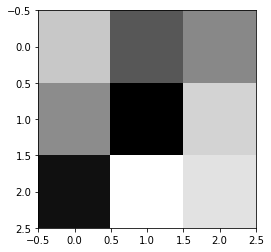

In [91]:
kernel1=k1[:,:,0,0]
plt.imshow(kernel1, cmap="gray")
#plt.axis('off')
plt.show()

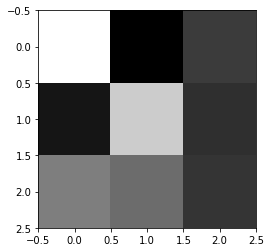

In [113]:
kernel2=k1[:,:,0,4]
plt.imshow(kernel2, cmap="gray")
#plt.axis('off')
plt.show()

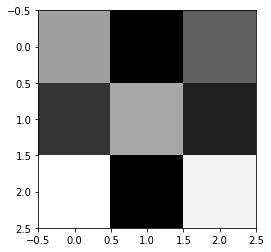

In [114]:
kernel4=k1[:,:,0,1]
plt.imshow(kernel4, cmap="gray")
#plt.axis('off')
plt.show()

Sample number is 59847



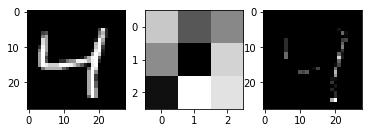

In [116]:
import cv2
sampleNo = np.random.randint(0,59999)
print(f'Sample number is {sampleNo}\n')


sampleImg=X_train[2]
filteredImage = cv2.filter2D(sampleImg,-1,kernel2)
#resize

fig,ax=plt.subplots(nrows=1,ncols=3)
ax[0].imshow(sampleImg, cmap="gray") 
ax[1].imshow(kernel1, cmap="gray")
ax[2].imshow(filteredImage, cmap="gray")

plt.show()

Model configuration

In [70]:
model.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trainable': True,
    'batch_input_shape': (None, 28, 28, 1),
    'dtype': 'float32',
    'filters': 10,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_2',
    'trainable': True,
    'filters': 3,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    

List all weight tensors in the model

In [95]:
weg=model.get_weights()

In [96]:
print(type(weg))

<class 'list'>


In [97]:
print(model.get_weights())

[array([[[[ 0.03284264,  0.0535639 , -0.33902022,  0.2912787 ,
           0.24894369,  0.32858965,  0.44737476, -0.10562371,
          -0.40485913,  0.42744553]],

        [[-0.11737894, -0.13661379, -0.04107858, -0.02910293,
          -0.0224612 , -0.1551753 ,  0.13452406, -0.26861367,
           0.07520234,  0.47106957]],

        [[ 0.00464771, -0.13660483,  0.3065263 , -0.21748148,
           0.26086536,  0.08394657, -0.25757617,  0.12910905,
           0.1377086 ,  0.07679778]]],


       [[[-0.13844962,  0.16326572, -0.03441856, -0.04197031,
          -0.37574464, -0.22339967,  0.46839702, -0.12685469,
          -0.52920306,  0.26055577]],

        [[-0.2463698 ,  0.3626273 ,  0.06242082,  0.29719982,
          -0.01392641,  0.07519634, -0.2554245 ,  0.13474734,
          -0.2420523 , -0.20138511]],

        [[ 0.23451902,  0.08096263,  0.17700723,  0.2556106 ,
          -0.02923692,  0.2292134 , -0.4482447 ,  0.04273593,
           0.41295436, -0.22342885]]],


       [[[-0.1614

## Fitting a neural network model to MNIST data
Transform the data into the network's expected input and then fit the model on training data and training labels. Model fitting requires a training data set, together with the training labels to the network.

#Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

In [98]:
# Fit the model
training=model.fit(x_train, Y_train, validation_split=0.2, epochs=5)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 95s 2ms/step - loss: 0.0144 - acc: 0.9950 - val_loss: 0.0652 - val_acc: 0.9840
Epoch 2/5
48000/48000 [==============================] - 117s 2ms/step - loss: 0.0131 - acc: 0.9953 - val_loss: 0.0669 - val_acc: 0.9858
Epoch 3/5
48000/48000 [==============================] - 92s 2ms/step - loss: 0.0107 - acc: 0.9965 - val_loss: 0.0662 - val_acc: 0.9839
Epoch 4/5
48000/48000 [==============================] - 112s 2ms/step - loss: 0.0082 - acc: 0.9969 - val_loss: 0.0730 - val_acc: 0.9849
Epoch 5/5
48000/48000 [==============================] - 138s 3ms/step - loss: 0.0077 - acc: 0.9974 - val_loss: 0.0705 - val_acc: 0.9837


To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

In [99]:
# Evaluate the model
score=model.evaluate(x_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 16s 2ms/step
Test loss: 0.06287402648411444
Test accuracy: 0.9854


## Evaluating a CNN with test data
To evaluate a trained neural network, you should provide a separate testing data set of labeled images. The model you fit in the previous exercise is available in your workspace.

Evaluate the data on a separate test set: test_data and test_labels.
Use the same batch size that was used for fitting (10 images per batch).

In [100]:
# Evaluate the model on separate test data
model.evaluate(x_test, Y_test, batch_size=10)

10000/10000 [==============================] - 22s 2ms/step


[0.06287402758247215, 0.9854000045061111]

## Plot the learning curves
During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this part we will plot the learning and validation loss curves for a model that you will train.

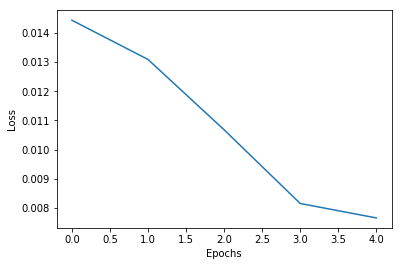

In [101]:
#import matplotlib.pyplot as plt

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')

# Show the figure
plt.show()

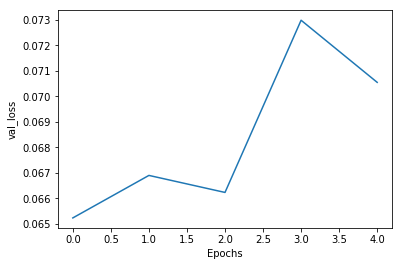

In [102]:
#import matplotlib.pyplot as plt

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.ylabel('val_loss')
plt.xlabel('Epochs')
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

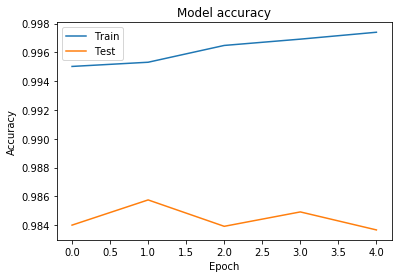

In [103]:
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

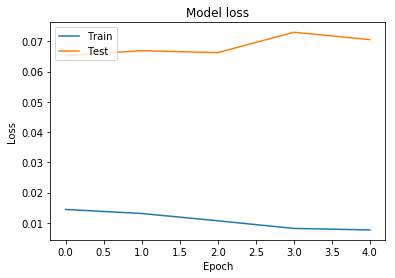

In [104]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [105]:
prediction = model.predict_classes(x_test, verbose=0)
submission = pd.DataFrame({"ImageId": list(range(1,len(prediction)+1)),
                         "Label": prediction})
submission.to_csv("submission.csv", index=False, header=True)

Sample number is 8217

Image number 8217 in MNIST dataset has the following (28, 28)

Shape of the image is (28, 28) and image is <class 'numpy.ndarray'> array



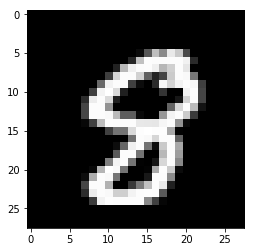

[8]


In [124]:
# Plot a random image from the training set 
# np.random.randint returns random integers between 0 and 59999.
sampleNo = np.random.randint(0,10000)
print(f'Sample number is {sampleNo}\n')
sampleImg=X_test[sampleNo]
print(f'Image number {sampleNo} in MNIST dataset has the following {sampleImg.shape}\n')
#print(sampleImg,'\n')
print(f'Shape of the image is {sampleImg.shape} and image is {type(sampleImg)} array\n')
plt.imshow(sampleImg, cmap="gray")
plt.show()

prediction = model.predict_classes(x_test[[sampleNo],:,:,:], verbose=0)
print(prediction)

# Exercise

### Add strides to a convolutional network
The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels. 

###  Calculate the size of convolutional layer output
Zero padding and strides affect the size of the output of a convolution. What is the size of the output for an input of size 256 by 256, with 2 kernels of size 3 by 3, padding of 1 and strides of 2?

###  How many parameters in the CNN?
We need to know how many parameters a CNN has, so we can adjust the model architecture, to reduce this number or shift parameters from one part of the network to another. How many parameters would a network have if its inputs are images with 28-by-28 pixels, there is one convolutional layer with 10 units kernels of 3-by-3 pixels, using zero padding (input has the same size as the output), and one densely connected layer with 10 units?

### How many parameters in the deep CNN?
In this exercise, you will use Keras to calculate the total number of parameters along with the number of parameters in each layer of the network.